## Machine Learning Project I: Bike Sharing Dataset - Tony Silva

When I saw we could choose a dataset to use for this project I immediately thought of the bike sharing dataset featured on Kaggle. I am both familiar with and passionate about this particular dataset because a similar set was used for an IBM assessment I recently took. I did not do particularly well, having little experience with free coding a machine learning workflow using python, from reading to writing a submission file. I thought it appropriate to use this dataset for the first project in this course in an attemot 

In [51]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats 
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math
import seaborn as sns

%pylab inline
%config InlineBackend.figure_formats = ['retina'] # 'svg'
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


### Read in the Dataset and Initial Exploration

The first task is to explore the data, perform any cleaning tasks and feature engineering, and then use visualizations to find any relevant correlations between the demand for bikes and any of the features involved. The initial plan is to explore the data using .info(), as well as getting the column names and the types for each feature. We can see that the target variable is the count, which will represent the demand for bikes. The features for season, weather, holiday, and working day were all changed from categorical to binary and ordinal values. We will not be using the datetime coulumn so we can ignore that its type is object for now.

In [40]:
# Read in the dataset

filepath = "train.csv"
data = pd.read_csv(filepath)
data.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
# Number of rows, number of columns

data.shape

(10886, 12)

In [6]:
# Get the column names

data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [7]:
# Get the data types

data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

### Cleaning the Data

It was a suprise to me that this particular dataset was already clean. The similar dataset I saw during the assessment was not clean and had null values to take care of. The season and waether features were also categorical. No manipulation of the data had to be done for the signifigance test that will be performed.

In [8]:
# Find the null values

data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [9]:
# Count the unique values

data.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [25]:
# Get statistics

data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### EDA with Visualization

It seems obvious to assume that the demand for bikes, 'count', is driven by the season, the absolute temperature, 'atemp', or the weather. For this initial exploration of the dataset, we will only look at these obvious features and their relationship with demand. We can confirm these are relevant features using desity plots of the 'count' for each of these attributes. In a plot of 'atemp' versus 'count' we can see that there is a definitely a positive relationship between temperature and demand, illustrated by the line fit through the data. 

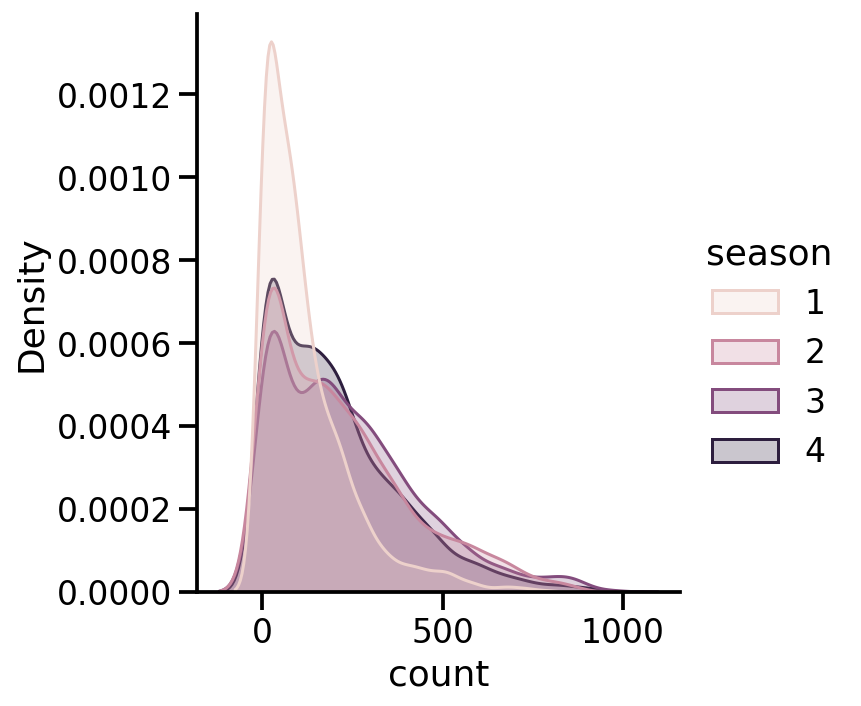

In [34]:
sns.displot(data, x="count", hue="season", kind='kde', fill=True)

#seasons:  1 = spring, 2 = summer, 3 = fall, 4 = winter

/Users/tonysilva/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


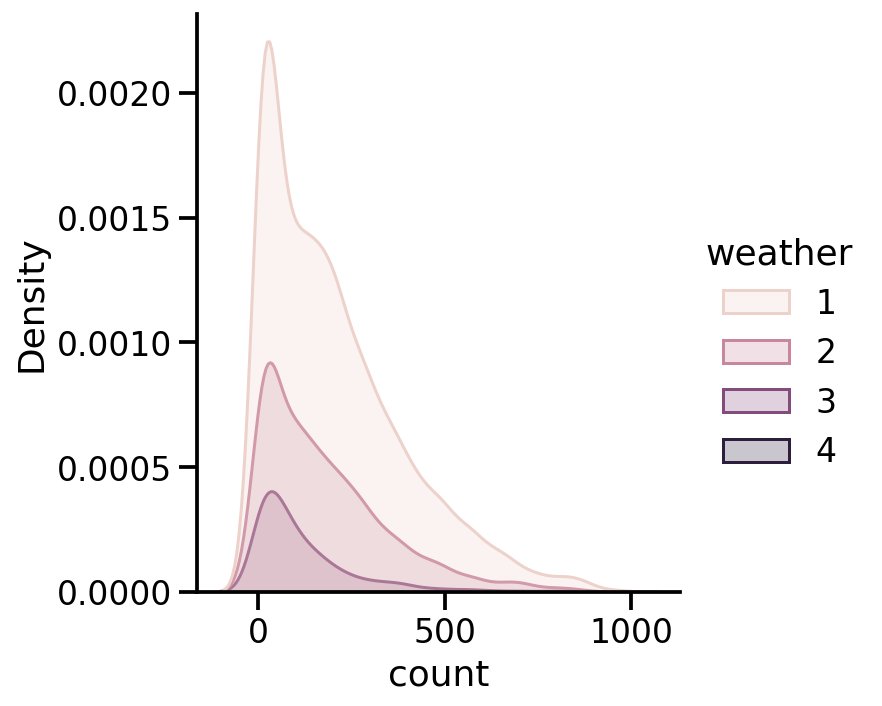

In [35]:
sns.displot(data, x="count", hue="weather", kind="kde", fill=True)

#weather: 
#      1: Clear, Few clouds, Partly cloudy, Partly cloudy 
#      2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
#      3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
#      4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

<AxesSubplot:xlabel='count', ylabel='atemp'>

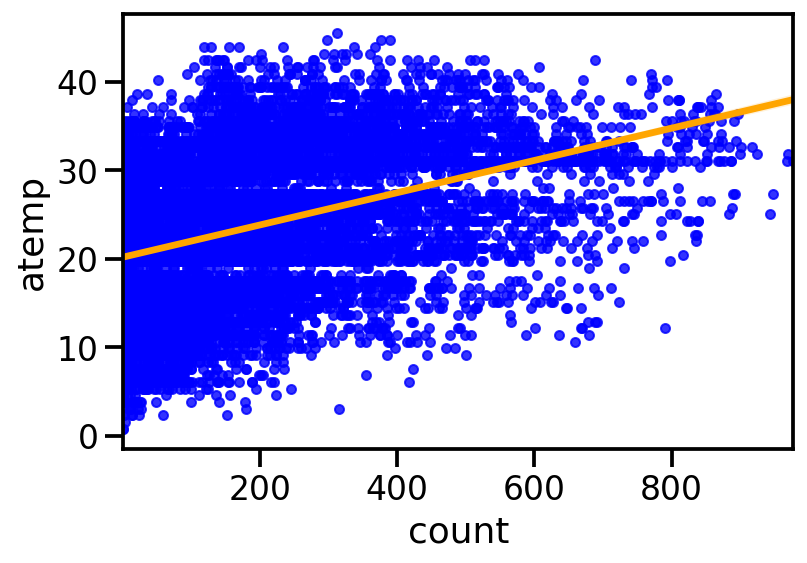

In [37]:
sns.regplot(x="count", y="atemp", data=data,marker=".",scatter_kws={"color": "b"}, line_kws={"color": "orange"})

### Hypothesis Testing

Hypothesis I: The demand for bikes is dependent on the absolute tempurature outdoors

Hypothesis II: The demand for bikes is dependent on the season

Hypothesis III: The demand for bikes is dependent on the the weather

I will chooses the first hypothesis and test whether the absolute tempurature has a significant positive affect on demand for bikes. 

As can be seen in the results below, the p-value is 0, so we can reject the null hypothesis that there is no significant correlation between absolute temperature and the bike count.

In [58]:
r_stat, p = spearmanr(data['atemp'], data['count'])
print('r_stat=%.3f, p=%.3f' %(r_stat,p))

r_stat=0.407, p=0.000


### Next Steps

The next step in exploring the dat might be to use a more complex form of predictive model like multi-linear regression to see if more than one feature effects the demand for bikes, as I expect. Below I use a simple linear regression just to test the idea.

This particular dataset was so easy to work with that next time I think I will look for a set that is more raw that requires cleaning. I will certainly be repeating this assignment at least one more time in order to become comfortable with performing significance tests using python libraries. My only previous experience with this sort of task was in RStudio. I would also like to correct the many mistakes that I know I am making by reviewing the work of my peers taking this course.

In [42]:
X = data[['atemp']]
y = data['count']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state = 4)


# Create a Linear regressor
LR = LinearRegression()

# Train the model using the training set 
LR.fit(X_train, y_train)

LinearRegression()

In [45]:
y_hat = LR.predict(X_test)
print('R^2:',metrics.r2_score(y_test, y_hat))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

R^2: 0.15988207446534974
Mean Absolute Error: 128.1094211816418
Mean Squared Error: 28233.737437506807
Root Mean Squared Error: 168.0289779695955
